In [0]:
import pandas as pd


In [0]:
train = pd.read_csv("/content/drive/My Drive/data/train.csv", parse_dates= ["datetime"])
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [0]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

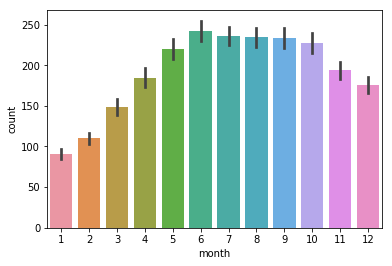

In [0]:
sns.barplot(data = train, x="month", y= "count") # 뭘넣어야할지

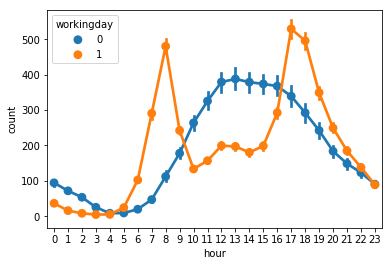

In [0]:
# 시간 월 년정도는 넣어야할듯
sns.pointplot(data=train, x="hour", y = 'count', hue = 'workingday') # 주중 주말. 워킹데이도 중요해보임

In [0]:
# 요일도 넣을까? 근데 요일항목이 없음 요일을 구해보자
train["dayofweek"] = train["datetime"].dt.dayofweek
train.head() # 0월요일~6일요일 구해져 train에 들어감

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


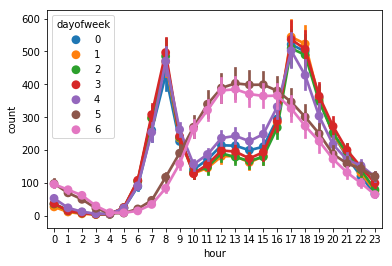

In [0]:
# 구했으니 그래프 그려보자
sns.pointplot(data=train, x="hour", y = 'count', hue = 'dayofweek') # 비슷한 패턴이긴한데 월요일, 금요일이 주말의 특성을 약간 따라감 -> 월금휴가를끼어서 휴일처럼씀

In [0]:
def year_month(datetime):
  return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(year_month)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,2011-1


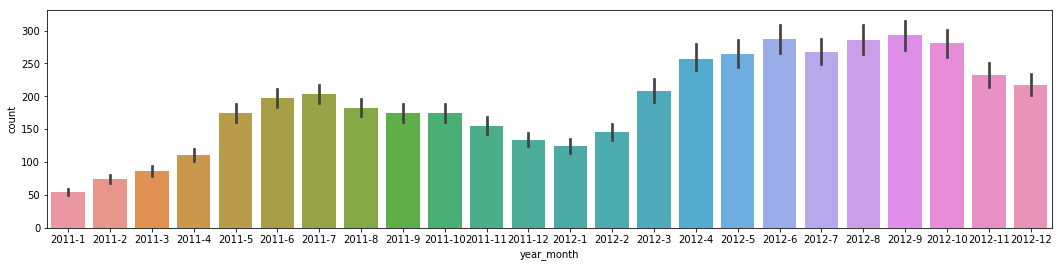

In [0]:
figure, ax = plt.subplots(nrows=1, ncols = 1)
figure.set_size_inches(18,4)
sns.barplot(data=train, x = "year_month", y="count")

In [0]:
test = pd.read_csv("/content/drive/My Drive/data/test.csv", parse_dates= ["datetime"])
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [0]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0


In [0]:
test["dayofweek"] = test["datetime"].dt.dayofweek

In [0]:
def year_month(datetime):
  return "{0}-{1}".format(datetime.year, datetime.month)

test["year_month"] = test["datetime"].apply(year_month)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek,year_month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3,2011-1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3,2011-1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3,2011-1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3,2011-1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3,2011-1


In [0]:
#머신러닝x에 넣을 특성들 // 서로 상관관계가 높은것들은 특성공학 ㅐㅎ주는게 좋음
features = ["season","holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed", "year", "month", "hour", "dayofweek"]
features

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'hour',
 'dayofweek']

In [0]:
X_train = train[features]
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,4,5


In [0]:
X_test = test[features]
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4,3


In [0]:
y_train = train["count"]
y_train.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [0]:
# 데이터 준비 끝
# 랜덤포레스트 배깅
from sklearn.ensemble import RandomForestRegressor

In [0]:
model = RandomForestRegressor(n_estimators = 3500,
                             max_depth = 12,
                             max_features = 0.7,
                             random_state=31,
                             )

In [0]:
# 크로스밸리데이션 준비
import numpy as np
from sklearn.metrics import make_scorer 

def rmsle(predict, actual):
  predict = np.array(predict)
  actual = np.array(actual)
  
  log_predict = np.log(predict+1)
  log_actual = np.log(actual+1)
  
  difference =log_predict - log_actual
  difference = np.square(difference)
  
  mean_difference = difference.mean()
  
  score = np.sqrt(mean_difference)
  
  return score
rmsle_score = make_scorer(rmsle) # 이거 안쓰면 크로스밸리데이션을 못씀
rmsle_score

make_scorer(rmsle)

In [0]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train, y_train, cv = 20, scoring = rmsle_score).mean()
print("내 점수는 = {0:.5f}".format(score)) # 파라메터 튜닝 하면 점수가 달라짐 그리드서치로 대략적 범위 찾고 랜덤서치로 그 안에서 세부적인부분 찾음

KeyboardInterrupt: ignored

In [0]:
# 교차검증은 트레인데이터로만 함 테스트데이터 건들지않음 트레인 내에서 하나 검증데이터 섞고 또 반복/홀드아웃

In [0]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions


array([ 11.34843055,   5.34444164,   3.55084061, ..., 146.15665798,
       113.0484705 ,  67.71315238])

In [0]:
submission = pd.read_csv("/content/drive/My Drive/data/sampleSubmission.csv") # predictions 결과를 파일에 넣을거임

In [0]:
submission["count"] = predictions
submission.to_csv("my_first_submission.csv", index = False)

In [0]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,11.556857
1,2011-01-20 01:00:00,5.368359
2,2011-01-20 02:00:00,3.777317
3,2011-01-20 03:00:00,2.943795
4,2011-01-20 04:00:00,2.922923
